In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)

path = "/content/gdrive/My Drive/DSD100_2/Mixtures/Dev/"

dirs = os.listdir(path)

path2 = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/"

dirs2 = os.listdir(path2)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import librosa
import scipy.signal as signal

Zxx1_all = []
Zxx2_all = []

sampl_rate = 11025

# On va découper le spectrogramme mix en morceaux de "taille" unités de temps
taille = 128

# Boucle sur un certain nombres de morceaux
for i in range (0,50,1):
    
    print(i, '----', dirs[i])
    
    mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Dev/" + dirs[i] + '/mixture.wav'
        
    audio_mixture, fe = librosa.load(path = mixture, sr = sampl_rate)
    
    vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Dev/" + dirs[i] + '/vocals.wav'
        
    audio_vocal, fe = librosa.load(path = vocal, sr = sampl_rate)
    
    # Passage dans le domaine spectral
    f, t, Zxx1 = signal.stft(audio_mixture, fs=sampl_rate, nperseg=1024)
    f, t, Zxx2 = signal.stft(audio_vocal, fs=sampl_rate, nperseg=1024)

    # Normalisation
    Zxx1 = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)/10/np.log((np.max(np.abs(Zxx1))**2+1e-12)/1e-12)
    Zxx2 = 10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12)/10/np.log((np.max(np.abs(Zxx1))**2+1e-12)/1e-12)

    a, b = Zxx1.shape
    b2 = np.floor(b/taille)

    for j in range(b2.astype(int)):
   
        Zxx1_i = Zxx1[:,j*taille:(j+1)*taille]
        Zxx2_i = Zxx2[:,j*taille:(j+1)*taille]
    
        # Matrice --> Vecteur    
        Zxx1_i_vector = np.reshape(Zxx1_i, -1)
        Zxx2_i_vector = np.reshape(Zxx2_i, -1)
    
        Zxx1_all.append(Zxx1_i_vector)
        Zxx2_all.append(Zxx2_i_vector)
    print(np.array(Zxx2_all).shape)
        

0 ---- The Long Wait - Dark Horses
(51, 65664)
1 ---- St Vitus - Word Gets Around
(92, 65664)
2 ---- Moosmusic - Big Dummy Shake
(125, 65664)
3 ---- Enda Reilly - Cur An Long Ag Seol
(156, 65664)
4 ---- Giselle - Moss
(189, 65664)
5 ---- Lyndsey Ollard - Catching Up
(227, 65664)
6 ---- Johnny Lokke - Whisper To A Scream
(270, 65664)
7 ---- Mu - Too Bright
(315, 65664)
8 ---- Wall Of Death - Femme
(355, 65664)
9 ---- Flags - 54
(408, 65664)
10 ---- Ben Carrigan - We'll Talk About It All Tonight
(450, 65664)
11 ---- Fergessen - Nos Palpitants
(483, 65664)
12 ---- Angels In Amplifiers - I'm Alright
(513, 65664)
13 ---- ANiMAL - Easy Tiger
(547, 65664)
14 ---- North To Alaska - All The Same
(588, 65664)
15 ---- Secretariat - Borderline
(636, 65664)
16 ---- The Sunshine Garcia Band - For I Am The Moon
(689, 65664)
17 ---- Detsky Sad - Walkie Talkie
(721, 65664)
18 ---- Leaf - Summerghost
(760, 65664)
19 ---- Hollow Ground - Left Blind
(786, 65664)
20 ---- Georgia Wonder - Siren
(858, 65664)

In [ ]:
Zxx1_all_val = []
Zxx2_all_val = []

# Boucle sur un certain nombres de morceaux
for i in range (0,50,1):
    
    print(i, '----', dirs2[i])
    
    mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/" + dirs2[i] + '/mixture.wav'
        
    audio_mixture, fe = librosa.load(path = mixture, sr = sampl_rate)
    
    vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Test/" + dirs2[i] + '/vocals.wav'
        
    audio_vocal, fe = librosa.load(path = vocal, sr = sampl_rate)
    
    # Passage dans le domaine spectral
    f, t, Zxx1 = signal.stft(audio_mixture, fs=sampl_rate, nperseg=1024)
    f, t, Zxx2 = signal.stft(audio_vocal, fs=sampl_rate, nperseg=1024)
    
    # Normalisation
    Zxx1 = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)/10/np.log((np.max(np.abs(Zxx1))**2+1e-12)/1e-12)
    Zxx2 = 10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12)/10/np.log((np.max(np.abs(Zxx1))**2+1e-12)/1e-12)

    a, b = Zxx1.shape
    b2 = np.floor(b/taille)

    for j in range(b2.astype(int)):
   
        Zxx1_i = Zxx1[:,j*taille:(j+1)*taille]
        Zxx2_i = Zxx2[:,j*taille:(j+1)*taille]
    
        # Matrice --> Vecteur    
        Zxx1_i_vector = np.reshape(Zxx1_i, -1)
        Zxx2_i_vector = np.reshape(Zxx2_i, -1)
    
        Zxx1_all_val.append(Zxx1_i_vector)
        Zxx2_all_val.append(Zxx2_i_vector)
    print(np.array(Zxx2_all_val).shape)
        

0 ---- Zeno - Signs
(39, 65664)
1 ---- The Long Wait - Back Home To Blue
(82, 65664)
2 ---- Young Griffo - Facade
(110, 65664)
3 ---- The Mountaineering Club - Mallory
(151, 65664)
4 ---- Louis Cressy Band - Good Time
(200, 65664)
5 ---- Atlantis Bound - It Was My Fault For Waiting
(245, 65664)
6 ---- Dark Ride - Burning Bridges
(284, 65664)
7 ---- Traffic Experiment - Sirens
(354, 65664)
8 ---- Hollow Ground - Ill Fate
(377, 65664)
9 ---- Tom McKenzie - Directions
(406, 65664)
10 ---- Triviul - Dorothy
(437, 65664)
11 ---- Signe Jakobsen - What Have You Done To Me
(466, 65664)
12 ---- BKS - Too Much
(503, 65664)
13 ---- Sambasevam Shanmugam - Kaathaadi
(556, 65664)
14 ---- Leaf - Come Around
(600, 65664)
15 ---- Swinging Steaks - Lost My Way
(652, 65664)
16 ---- Fergessen - The Wind
(684, 65664)
17 ---- Phre The Eon - Everybody's Falling Apart
(721, 65664)
18 ---- Raft Monk - Tiring
(756, 65664)
19 ---- Carlos Gonzalez - A Place For Us
(798, 65664)
20 ---- Nerve 9 - Pray For The Rain


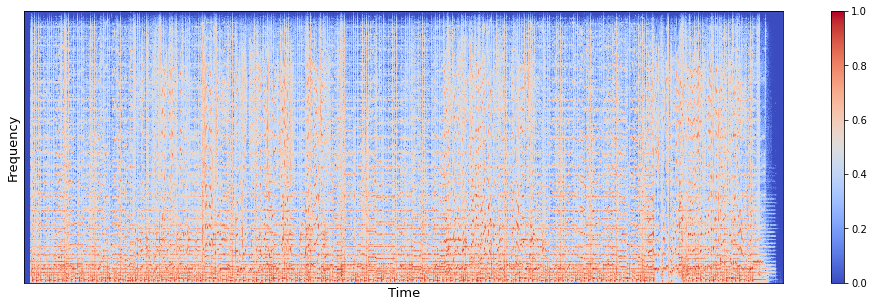

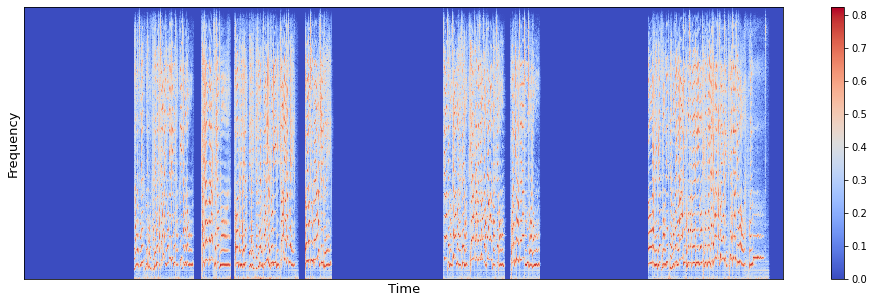

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# Visu
# On affiche le spectrogramme mix
plt.figure(figsize=(17,5))
librosa.display.specshow(Zxx1, cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.show();


# On affiche le vocal
plt.figure(figsize=(17,5))
librosa.display.specshow(Zxx2, cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.show();

In [ ]:
from scipy.io.wavfile import write
from IPython.display import Audio

# Ecoute du canal mix
signal_reconstruit = signal.istft(Zxx1, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/mix_train.wav", sampl_rate, pour_export.astype(np.float32))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Ecoute du canal vocal
signal_reconstruit = signal.istft(Zxx2, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)

#pour_export = np.array(signal_reconstruit)[1,:]

#write("/content/gdrive/My Drive/vocal_train.wav", sampl_rate, pour_export.astype(np.float32))



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_train = np.array(Zxx1_all).reshape((-1,513,taille,1))
y_train = np.array(Zxx2_all).reshape((-1,513,taille,1))

X_test = np.array(Zxx1_all_val).reshape((-1,513,taille,1))
y_test = np.array(Zxx2_all_val).reshape((-1,513,taille,1))

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2167, 513, 128, 1)
(2167, 513, 128, 1)
(2024, 513, 128, 1)
(2024, 513, 128, 1)


In [ ]:
'''
# J'agrandis le train avec des morceaux du test

X_train = np.concatenate((X_train, X_test[0:1000,:,:,:]), axis=0)
y_train = np.concatenate((y_train, y_test[0:1000,:,:,:]), axis=0)

X_test = X_test[1000:,:,:,:]
y_test = y_test[1000:,:,:,:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
'''

(3167, 513, 128, 1)
(3167, 513, 128, 1)
(1024, 513, 128, 1)
(1024, 513, 128, 1)


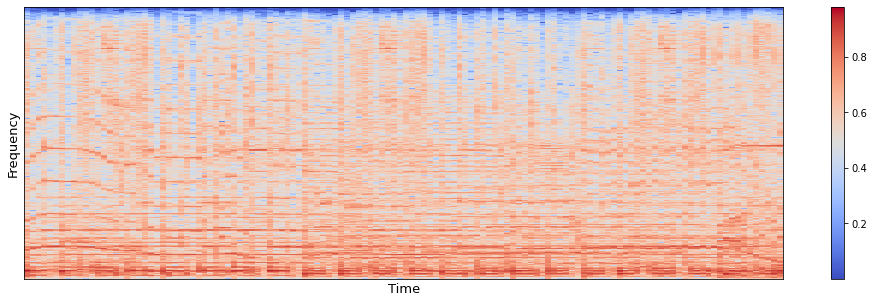

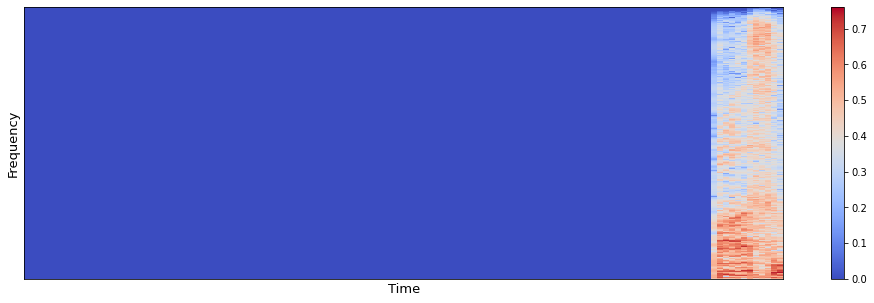

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# petite vérification

# On affiche le spectrogramme mix
plt.figure(figsize=(17,5))
librosa.display.specshow(X_train[550,:,:,0], cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.show();


# On affiche le vocal cible
plt.figure(figsize=(17,5))
librosa.display.specshow(y_train[550,:,:,0], cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.show();

In [ ]:
# Définition du réseau de neurones
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 8, kernel_size=(3,3), stride=(2, 2), padding=2) # ré-essayer de doubler / kernel size de 3,3 plutôt
        self.conv_bn1 = torch.nn.BatchNorm2d(8)
        self.conv2 = torch.nn.Conv2d(8, 16, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.conv_bn2 = torch.nn.BatchNorm2d(16)
        self.conv3 = torch.nn.Conv2d(16, 32, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.conv_bn3 = torch.nn.BatchNorm2d(32)
        self.conv4 = torch.nn.Conv2d(32, 64, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.conv_bn4 = torch.nn.BatchNorm2d(64)
        self.conv5 = torch.nn.Conv2d(64, 128, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.conv_bn5 = torch.nn.BatchNorm2d(128)
        self.conv6 = torch.nn.Conv2d(128, 256, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.conv_bn6 = torch.nn.BatchNorm2d(256)
      
        self.deconv1 = torch.nn.ConvTranspose2d(256, 128, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.deconv_bn1 = torch.nn.BatchNorm2d(128)
        self.dropout1 = torch.nn.Dropout2d(0.2)
        self.deconv2 = torch.nn.ConvTranspose2d(256, 64, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.deconv_bn2 = torch.nn.BatchNorm2d(64)
        self.dropout2 = torch.nn.Dropout2d(0.2)
        self.deconv3 = torch.nn.ConvTranspose2d(128, 32, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.deconv_bn3 = torch.nn.BatchNorm2d(32)
        self.dropout3 = torch.nn.Dropout2d(0.2)
        self.deconv4 = torch.nn.ConvTranspose2d(64, 16, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.deconv_bn4 = torch.nn.BatchNorm2d(16)
        self.deconv5 = torch.nn.ConvTranspose2d(32, 8, kernel_size=(3,3), stride=(2, 2), padding=2)
        self.deconv_bn5 = torch.nn.BatchNorm2d(8)
        self.deconv6 = torch.nn.ConvTranspose2d(16, 1, kernel_size=(3,3), stride=(2, 2), padding=2)

    def forward(self, x):
        h1 = F.leaky_relu(self.conv_bn1(self.conv1(x)))
        h2 = F.leaky_relu(self.conv_bn2(self.conv2(h1)))
        h3 = F.leaky_relu(self.conv_bn3(self.conv3(h2)))
        h4 = F.leaky_relu(self.conv_bn4(self.conv4(h3)))
        h5 = F.leaky_relu(self.conv_bn5(self.conv5(h4)))
        h = F.leaky_relu(self.conv_bn6(self.conv6(h5)))

        h = self.dropout1(F.relu(self.deconv_bn1(self.deconv1(h, output_size = h5.size()))))
        h = torch.cat((h, h5), dim=1)
        h = self.dropout2(F.relu(self.deconv_bn2(self.deconv2(h, output_size = h4.size()))))
        h = torch.cat((h, h4), dim=1)
        h = self.dropout3(F.relu(self.deconv_bn3(self.deconv3(h, output_size = h3.size()))))
        h = torch.cat((h, h3), dim=1)
        h = F.relu(self.deconv_bn4(self.deconv4(h, output_size = h2.size())))
        h = torch.cat((h, h2), dim=1)
        h = F.relu(self.deconv_bn5(self.deconv5(h, output_size = h1.size())))
        h = torch.cat((h, h1), dim=1)
        h = F.sigmoid(self.deconv6(h, output_size = x.size()))
        return h



In [ ]:
from torchsummary import summary

model = Net()

if torch.cuda.is_available():
    model.cuda()

summary(model, (1,513,taille))

if torch.cuda.is_available():
    dev = "cuda:0"
    print('GPU mounted')

device = torch.device(dev)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 8, 258, 65]              80
       BatchNorm2d-2           [-1, 8, 258, 65]              16
            Conv2d-3          [-1, 16, 130, 34]           1,168
       BatchNorm2d-4          [-1, 16, 130, 34]              32
            Conv2d-5           [-1, 32, 66, 18]           4,640
       BatchNorm2d-6           [-1, 32, 66, 18]              64
            Conv2d-7           [-1, 64, 34, 10]          18,496
       BatchNorm2d-8           [-1, 64, 34, 10]             128
            Conv2d-9           [-1, 128, 18, 6]          73,856
      BatchNorm2d-10           [-1, 128, 18, 6]             256
           Conv2d-11           [-1, 256, 10, 4]         295,168
      BatchNorm2d-12           [-1, 256, 10, 4]             512
  ConvTranspose2d-13           [-1, 128, 18, 6]         295,040
      BatchNorm2d-14           [-1, 128

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
from torch.utils.data import Dataset

batch_size=8

class CustomDataset(Dataset):
    def __init__(self):
        self.X_train = X_train
        self.y_train = y_train
    def __len__(self):
        return len(self.X_train)   
    def __getitem__(self, idx):
        X_train_i, y_train_i = self.X_train[idx], self.y_train[idx]
        X_train_i = torch.tensor(X_train_i)
        y_train_i = torch.tensor(y_train_i)
        return X_train_i, y_train_i

dataset = CustomDataset()
training_generator = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

class CustomDataset_test(Dataset):
    def __init__(self):
        self.X_test = X_test
        self.y_test = y_test
    def __len__(self):
        return len(self.X_test)   
    def __getitem__(self, idx):
        X_test_i, y_test_i = self.X_test[idx], self.y_test[idx]
        X_test_i = torch.tensor(X_test_i)
        y_test_i = torch.tensor(y_test_i)
        return X_test_i, y_test_i

dataset_test = CustomDataset_test()
testing_generator = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

In [ ]:
import os
import torch.nn as nn
from progressbar import ProgressBar

n_files = len(X_train)
n_files_test = len(X_test)
print(n_files)
print(n_files_test)

net = Net()
net.to(torch.device("cuda:0"))
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.MSELoss()

loss_values = []
loss_values_test = []
for epoch in range(0,40,1):

    loss_epoch = 0
    loss_epoch_test = 0

    pbar = ProgressBar()

    for local_batch, local_labels in pbar(training_generator):

        inputs = local_batch
        outputs = local_labels
        
        optimizer.zero_grad()

        inputs = torch.squeeze(inputs,3)
        inputs = torch.unsqueeze(inputs,1)
        inputs = inputs.to(device)

        outputs = torch.squeeze(outputs ,3)
        outputs = torch.unsqueeze(outputs ,1)
        outputs = outputs.to(device)

        #print(np.shape(inputs), np.shape(outputs))
  
        outputs_net = net(inputs.float())
        outputs_net = outputs_net * inputs.float()

        #print(np.shape(outputs_net))
    
        #loss = criterion(outputs, outputs_net)
        loss = F.l1_loss(outputs, outputs_net, reduction='mean')
        loss_epoch = loss_epoch + loss
           
        loss.backward()
        optimizer.step()

    for local_batch, local_labels in testing_generator:

        inputs = local_batch
        outputs = local_labels
    
        inputs = torch.squeeze(inputs,3)
        inputs = torch.unsqueeze(inputs,1)
        inputs = inputs.to(device)

        outputs = torch.squeeze(outputs ,3)
        outputs = torch.unsqueeze(outputs ,1)
        outputs = outputs.to(device)
  
        outputs_net = net(inputs.float()).detach()
        outputs_net = outputs_net * inputs.float()
    
        #loss = criterion(outputs, outputs_net)
        loss2 = F.l1_loss(outputs, outputs_net, reduction='mean')# mettre mean au lieu de sum
        loss_epoch_test = loss_epoch_test + loss2
        
    loss_values.append(loss_epoch/len(training_generator))
    loss_values_test.append(loss_epoch_test/len(testing_generator))
    print('epoch %i, loss : %.8f, val loss : %.8f' %(epoch,loss_epoch/len(training_generator),loss_epoch_test/len(testing_generator)))


N/A% (0 of 271) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05

2167
2024


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 0, loss : 0.13805279, val loss : 0.14557107


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 1, loss : 0.13066030, val loss : 0.14087276


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 2, loss : 0.12526138, val loss : 0.13464892


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 3, loss : 0.11958289, val loss : 0.13131545


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 4, loss : 0.11259705, val loss : 0.13199115


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05

epoch 5, loss : 0.11115947, val loss : 0.12545967


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 6, loss : 0.10620189, val loss : 0.12436578


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 7, loss : 0.10197137, val loss : 0.12583657


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 8, loss : 0.09917432, val loss : 0.12371781


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 9, loss : 0.09331483, val loss : 0.12412594


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 10, loss : 0.09170051, val loss : 0.12627684


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05

epoch 11, loss : 0.08907358, val loss : 0.12916054


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 12, loss : 0.08467542, val loss : 0.12516160


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 13, loss : 0.08157733, val loss : 0.12392413


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 14, loss : 0.07925019, val loss : 0.12322801


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 15, loss : 0.07628079, val loss : 0.12031037


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 16, loss : 0.07340002, val loss : 0.12440350


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 17, loss : 0.07209350, val loss : 0.12206858


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05

epoch 18, loss : 0.07078230, val loss : 0.12335653


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 19, loss : 0.07033236, val loss : 0.12511113


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 20, loss : 0.06698173, val loss : 0.12673442


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 21, loss : 0.06556711, val loss : 0.12131673


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 22, loss : 0.06374446, val loss : 0.12321907


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 23, loss : 0.06453411, val loss : 0.12522916


100% (271 of 271) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 24, loss : 0.06110144, val loss : 0.12575562


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05

epoch 25, loss : 0.06024184, val loss : 0.12256930


100% (271 of 271) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05

epoch 26, loss : 0.05989958, val loss : 0.12433911


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05

epoch 27, loss : 0.05902668, val loss : 0.12460332


100% (271 of 271) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 28, loss : 0.05930964, val loss : 0.12223023


100% (271 of 271) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 29, loss : 0.05814239, val loss : 0.12856582


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 30, loss : 0.05721837, val loss : 0.12692797


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 31, loss : 0.05688179, val loss : 0.12359026


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:05

epoch 32, loss : 0.05676689, val loss : 0.12524250


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 33, loss : 0.05538751, val loss : 0.12484449


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  2% (7 of 271) |                        | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 34, loss : 0.05478464, val loss : 0.12524112


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 35, loss : 0.05444467, val loss : 0.12287488


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 36, loss : 0.05435824, val loss : 0.12715353


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 37, loss : 0.05376575, val loss : 0.12517421


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04
  4% (11 of 271) |                       | Elapsed Time: 0:00:00 ETA:   0:00:04

epoch 38, loss : 0.05486154, val loss : 0.12530807


100% (271 of 271) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


epoch 39, loss : 0.05391246, val loss : 0.12523609


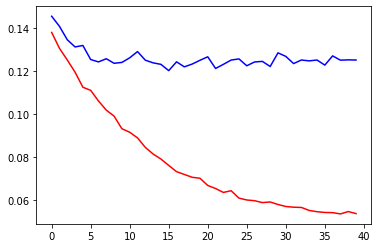

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_values, 'r',loss_values_test, 'b')

#PATH = './net_abs.pth'
#torch.save(net, PATH)

In [ ]:
num = 13

mixture = "/content/gdrive/My Drive/DSD100_2/Mixtures/Test/" + dirs2[num] + '/mixture.wav'
        
audio_mixture, fe = librosa.load(path = mixture, sr = sampl_rate)
    
vocal = "/content/gdrive/My Drive/DSD100_2/Sources/Test/" + dirs2[num] + '/vocals.wav'
        
audio_vocal, fe = librosa.load(path = vocal, sr = sampl_rate)
    
# Passage dans le domaine spectral
debut = 90*sampl_rate
fin = 120*sampl_rate

f, t, Zxx1 = signal.stft(audio_mixture[debut:fin], fs=sampl_rate, nperseg=1024)
f, t, Zxx2 = signal.stft(audio_vocal[debut:fin], fs=sampl_rate, nperseg=1024)

Zxx1 = 10*np.log((np.abs(Zxx1)**2+1e-12)/1e-12)/10/np.log((np.max(np.abs(Zxx1))**2+1e-12)/1e-12)
Zxx2 = 10*np.log((np.abs(Zxx2)**2+1e-12)/1e-12)/10/np.log((np.max(np.abs(Zxx1))**2+1e-12)/1e-12)

a, b = Zxx1.shape
b2 = np.floor(b/taille)

outputs = np.zeros((513,b))
outputs = np.array(outputs)

for j in range(b2.astype(int)):
   
    inputs = Zxx1[:,j*taille:(j+1)*taille]

    inputs = torch.tensor(inputs) 
    inputs = torch.unsqueeze(inputs,0)
    inputs = torch.unsqueeze(inputs,0)
    inputs = inputs.to(device)

    outputs_net = net(inputs.float()).detach()
    outputs_net = outputs_net * inputs.float()

    outputs_net = torch.squeeze(outputs_net,0)
    outputs_net = torch.squeeze(outputs_net,0)

    outputs[:,j*taille:(j+1)*taille] = outputs_net.cpu().detach().numpy()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


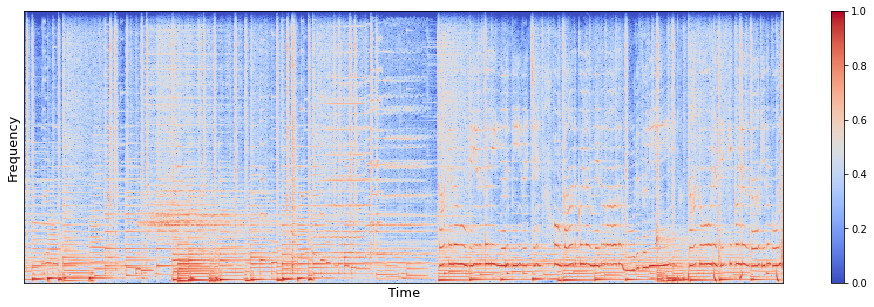

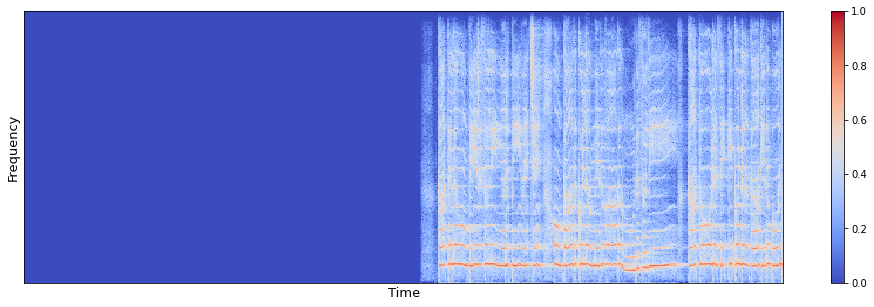

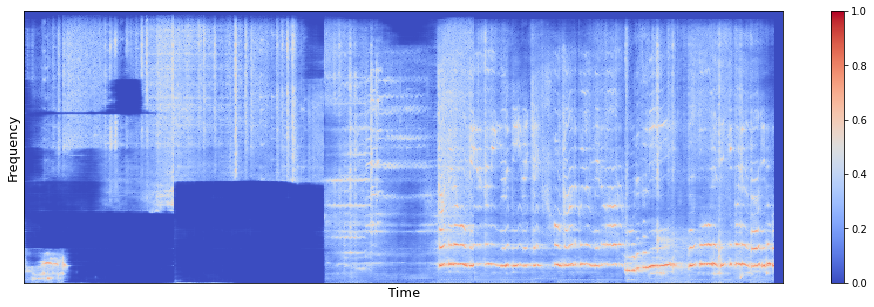

In [ ]:
import librosa.display

# On affiche le spectrogramme mix
plt.figure(figsize=(17,5))
librosa.display.specshow(Zxx1, cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.clim(0,1)
plt.show();


# On affiche le vocal cible
plt.figure(figsize=(17,5))
librosa.display.specshow(Zxx2, cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.colorbar()
plt.clim(0,1)
plt.show();

# On affiche le vocal calculé
plt.figure(figsize=(17,5))
librosa.display.specshow(outputs, cmap='coolwarm')
plt.xlabel ('Time', fontsize=13)
plt.ylabel ('Frequency', fontsize=13)
plt.clim(0,1)
plt.colorbar()
plt.show();

In [ ]:
from IPython.display import Audio

# Ecoute

f, t, Zxx1 = signal.stft(audio_mixture[debut:fin], fs=sampl_rate, nperseg=1024)

a, b = Zxx1.shape

phase  = np.angle(np.array(Zxx1[:,0:b]))

stft = np.sqrt(np.exp(outputs*10*np.log((np.max(np.abs(Zxx1))**2+1e-12)/1e-12)/10)*1e-12-1e-12) * np.exp(1j * phase)

signal_reconstruit = signal.istft(stft, fs=sampl_rate)

Audio(np.array(signal_reconstruit)[1,:], rate = sampl_rate)


In [ ]:
# Vocal cible

Audio(audio_vocal, rate = sampl_rate)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Mix

Audio(audio_mixture, rate = sampl_rate)

Output hidden; open in https://colab.research.google.com to view.

(2, 330750)
(2, 330750)
[[-1.35994666e+01 -2.35788855e+01 -3.00813323e+01 -3.81904202e+01
  -3.84242968e+01 -3.66210300e+01 -3.00928300e+01 -3.42583826e+01
  -3.96153654e+01 -4.00541263e+01 -3.62413576e+01 -4.22891525e+01
  -4.66291406e+01 -4.99157292e+01 -5.23079595e+01 -5.42024958e+01
  -4.22318257e+01 -4.10269597e+01 -4.17112227e+01 -4.31417035e+01
  -4.69984124e+01 -4.29049210e+01 -4.38421843e+01 -4.73153784e+01
  -4.51490835e+01 -4.30829765e+01 -4.55900982e+01 -4.59947455e+01
  -4.65769874e+01 -4.69630524e+01]
 [ 1.26294012e-01  1.01540613e-01  2.42892008e-03  4.36189090e-02
   2.64450155e-02  3.78857516e-02  1.66353200e-03  2.41505780e-03
   1.60182727e-02  2.47121181e-03  9.07469190e-03  4.29055722e-03
   1.74553446e-01  3.90760791e-01  1.26849470e-01  6.19669738e-02
   7.34763742e-01  8.51098417e-01  3.96076287e-01  7.10391028e-01
   3.05395062e-01  4.97989789e-01  4.58524896e-01  5.54514835e-01
   1.00223216e+00  4.09534463e-01  5.50589567e-01  8.39618935e-01
   9.10025692e-01

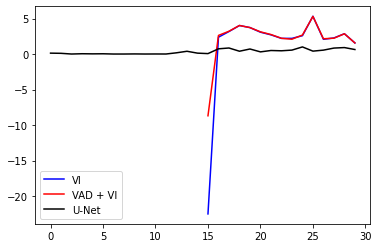

In [ ]:
# Calcul du SDR

#!pip install museval

import museval

audio_mixture2 = np.array([audio_mixture,]*2).transpose()
audio_mixture2 = audio_mixture2.transpose()

print(audio_mixture2[:,debut:fin].shape)
print(np.shape(np.array(signal_reconstruit)[:,:-2]))

(sdr, isr, sir, sar) = museval.evaluate(audio_mixture2[:,debut:fin], np.array(signal_reconstruit)[:,:-2], win=11025, hop=11025)

print(sdr)

sdr_VI = np.loadtxt('/content/gdrive/My Drive/VI_SDR.dat')
sdr_VAD_VI = np.loadtxt('/content/gdrive/My Drive/VAD_VI_SDR.dat')

plt.plot(sdr_VI[1,:],'-b', label='VI')
plt.plot(sdr_VAD_VI[1,:],'-r', label='VAD + VI')
plt.plot(sdr[1,:],'-k', label='U-Net')
plt.legend(loc="best")
plt.show()